In [93]:
import csv

In [94]:
import pandas as pd

In [124]:
#path = '../../bert-cmp/bert/'
path = '../sparse/'

In [125]:
results_df = pd.read_csv(path+'cls_output/test_results.tsv', header=None, sep='\t')
results_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
0,0.000399,0.000342,0.000380,0.000350,0.000264,0.901069,0.000240,0.000356,0.000324,0.000321,...,0.000367,0.000254,0.000216,0.000254,0.000255,0.000204,0.000170,0.000160,0.000138,0.000333
1,0.001290,0.010545,0.001825,0.001661,0.001313,0.002090,0.003562,0.002553,0.001355,0.002622,...,0.001841,0.001863,0.002519,0.002107,0.003121,0.001771,0.002401,0.001852,0.001286,0.003034
2,0.001876,0.001126,0.001211,0.001370,0.000909,0.001858,0.007690,0.001698,0.002108,0.002983,...,0.001680,0.001365,0.001057,0.001036,0.001565,0.001407,0.002132,0.001676,0.002545,0.001386
3,0.001275,0.001973,0.002989,0.002538,0.001087,0.001204,0.003934,0.001867,0.002137,0.002371,...,0.001544,0.001922,0.001250,0.001026,0.001532,0.001392,0.002205,0.001938,0.004727,0.003306
4,0.000277,0.000125,0.000194,0.000210,0.000132,0.000287,0.000062,0.000218,0.000128,0.000106,...,0.000114,0.000146,0.000112,0.000257,0.000126,0.000125,0.000118,0.000104,0.000182,0.000159
5,0.000022,0.000036,0.000129,0.000030,0.000015,0.000014,0.000078,0.000027,0.000014,0.000038,...,0.000016,0.000034,0.000020,0.000031,0.000032,0.000020,0.000032,0.000019,0.000057,0.000021
6,0.000186,0.000095,0.000106,0.000147,0.000121,0.000128,0.000161,0.000057,0.000084,0.000214,...,0.000068,0.000160,0.000055,0.000192,0.000149,0.000059,0.000137,0.000067,0.000054,0.000072
7,0.000012,0.000010,0.000010,0.000020,0.000005,0.000028,0.000029,0.000011,0.000008,0.000014,...,0.000011,0.000014,0.000010,0.000016,0.000021,0.000012,0.000010,0.000010,0.000024,0.000014
8,0.001692,0.003752,0.003454,0.003444,0.002472,0.003625,0.000944,0.001508,0.002216,0.001201,...,0.001808,0.001405,0.001708,0.001684,0.001530,0.001408,0.001554,0.001364,0.001991,0.001528
9,0.001016,0.000847,0.003369,0.000925,0.001630,0.001927,0.001444,0.000537,0.001437,0.002805,...,0.000596,0.002927,0.000406,0.001699,0.001538,0.000548,0.001320,0.000408,0.000711,0.001013


In [126]:
results_df.shape

(75, 367)

In [127]:
vocab_label_df = pd.read_csv(path+'sparse_fname2_vocab-label.txt', header=None)
vocab_label_df.shape

(367, 1)

In [128]:
import numpy as np

In [129]:
n=10
preds = []
for idx, row in results_df.iterrows():
    top_n = list(np.argsort(-row)[:n])
    preds.append(top_n[:n])

In [130]:
preds

[[5, 325, 326, 25, 327, 27, 147, 93, 211, 241],
 [12, 13, 324, 1, 106, 317, 139, 105, 107, 243],
 [17, 18, 25, 16, 50, 72, 6, 65, 20, 47],
 [25, 225, 12, 50, 248, 82, 190, 226, 88, 187],
 [27, 110, 340, 73, 223, 70, 337, 182, 174, 76],
 [12, 50, 17, 143, 207, 226, 25, 182, 2, 242],
 [24, 242, 50, 183, 240, 72, 137, 156, 136, 124],
 [25, 12, 134, 72, 327, 49, 148, 242, 226, 62],
 [32, 31, 28, 30, 33, 129, 197, 194, 24, 215],
 [50, 24, 53, 138, 47, 49, 72, 240, 352, 205],
 [12, 24, 111, 71, 68, 110, 308, 147, 13, 117],
 [12, 6, 207, 143, 226, 242, 198, 25, 308, 91],
 [16, 50, 75, 18, 20, 12, 36, 82, 13, 135],
 [101, 5, 12, 18, 64, 327, 306, 268, 326, 69],
 [110, 111, 121, 365, 115, 138, 226, 27, 109, 56],
 [111, 110, 119, 206, 137, 116, 121, 118, 64, 108],
 [12, 25, 143, 207, 6, 198, 242, 50, 226, 17],
 [123, 166, 195, 224, 77, 250, 6, 193, 297, 141],
 [50, 53, 24, 138, 47, 12, 352, 135, 240, 137],
 [128, 129, 127, 211, 16, 137, 138, 189, 30, 68],
 [128, 129, 127, 211, 16, 137, 138, 189,

In [131]:
label_df = pd.read_csv(path+'sparse_fname_split_magret_label_val.txt', header=None)
label_df.shape

(75, 1)

In [132]:
labels= []; labels_str =[]
for idx, row in label_df.iterrows():
    labels.append(vocab_label_df.index[vocab_label_df[0]==row[0]][0])
    labels_str.append(row[0])

In [133]:
labels_str

['clone',
 'selu',
 'top_k_categorical_accuracy',
 'on_train_begin',
 '__init__',
 'from_config',
 '__call__',
 '__init__',
 '__init__',
 'he_uniform',
 'logcosh',
 'raise_duplicate_arg_error',
 '_get_available_devices',
 'dl_progress',
 'unpack_singleton',
 'Xception',
 'preprocess_input',
 'decode_predictions',
 'get_config',
 '__init__',
 '__init__',
 'get_config',
 'updates',
 'cell',
 '_pooling_function',
 'call',
 'call',
 '__init__',
 '__init__',
 'call',
 'call',
 'call',
 'get_weights',
 'get_losses_for',
 'call',
 'get_config',
 '__init__',
 'is_keras_tensor',
 'zeros',
 'function',
 'forward',
 'int_shape',
 'ndim',
 'zeros_like',
 'argmax',
 'reshape',
 'slice',
 'in_test_phase',
 'hard_sigmoid',
 'foldl',
 '_prepare_name',
 'is_keras_tensor',
 'is_tensor',
 'zeros',
 'cumprod',
 'argmax',
 'clip',
 'arange',
 'elu',
 'binary_crossentropy',
 '_preprocess_conv3d_input',
 'random_binomial',
 'map_fn',
 'add_unprocessed_node',
 'process_layer',
 'convert_nested_time_distribute

In [134]:
vocab_label_df.loc[0][0]

'clone'

In [135]:
snippet = pd.read_csv(path+'sparse_fname_split_magret_tk_val.txt', header=None)
snippet.loc[10][0]

'[CLS] FunctionDef arguments arg y true arg y pred Expr Str FunctionDef arguments arg x Return BinOp BinOp Name Add Call Attribute softplus Name BinOp UnaryOp USub Num Mult Name Sub Call Attribute log Name Num Return Call Attribute mean Name Call Name BinOp Name Name keyword UnaryOp Num'

In [137]:
pred_str = []; score = 0; rank =[]
for idx, r in enumerate(preds):
    print(snippet.loc[idx][0])
    print("Label =", labels_str[idx])
    preds_ = []
    print("Pred  =")
    correct = False
    for i in range(7):
        p = vocab_label_df.loc[r[i]][0] 
        if p==labels_str[idx]:
            score +=1
            rank.append(i+1)
            print("---- {}. {}".format(i,p))
            correct = True
        else:
            print("     {}. {}".format(i,p))
        preds_.append(p)
    if correct == False:
        rank.append(i)
    pred_str.append(preds_)
    print()

[CLS] FunctionDef arguments arg layer Return Call Attribute from config Attribute class Name Call Attribute get config Name
Label = clone
Pred  =
     0. deserialize
     1. unpickle_model
     2. model_from_config
     3. get_config
     4. model_from_yaml
     5. from_config
     6. _pooling_function

[CLS] FunctionDef arguments arg x Expr Str Assign Name alpha Num Assign Name scale Num Return BinOp Name Mult Call Attribute elu Name Name Name
Label = selu
Pred  =
     0. __init__
     1. set_params
     2. pickle_model
     3. clone_model
     4. predict_proba
     5. __setstate__
     6. set_weights

[CLS] FunctionDef arguments arg y true arg y pred arg k Num Return Call Attribute mean Name Call Attribute in top k Name Name Call Attribute argmax Name Name keyword UnaryOp USub Num Name keyword UnaryOp Num
Label = top_k_categorical_accuracy
Pred  =
     0. on_train_begin
     1. on_train_end
     2. get_config
     3. on_epoch_end
     4. call
     5. count_params
     6. get

[CLS] F

In [138]:
score/len(preds)

0.09333333333333334

In [110]:
1/np.mean(rank)

0.9740259740259741

In [139]:
from scipy import io

In [142]:
m = io.mmread('../sparse/adj/0_sparse_fname2_split_magret_adj.mtx').toarray()

In [144]:
import matplotlib.pyplot as plt

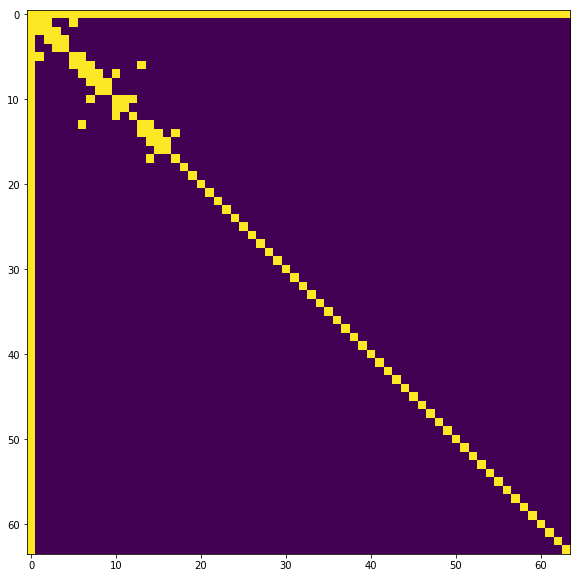

In [156]:
plt.figure(figsize=(10,10))
plt.imshow(m)

In [170]:
np.count_nonzero(m[56,:])

2

In [171]:
eye = np.eye(64)

In [194]:
shuffle_idx = np.random.permutation(20)

In [195]:
G = nx.from_numpy_matrix(m)
shuffled_adj = nx.adjacency_matrix(G, nodelist=shuffle_idx).todense()

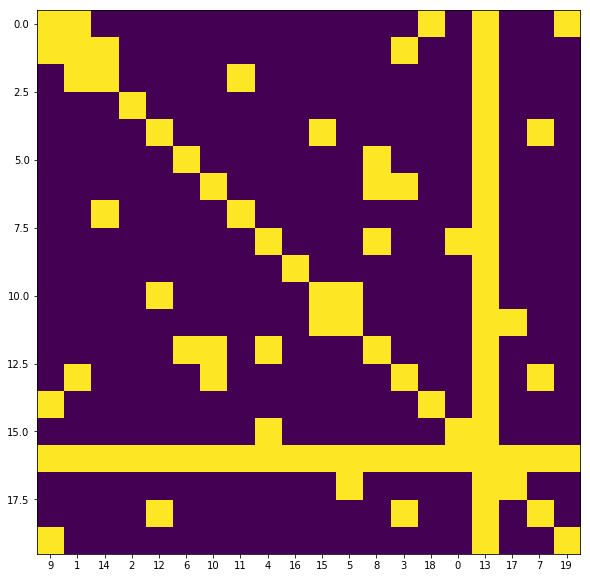

In [196]:
plt.figure(figsize=(10,10))
plt.imshow(shuffled_adj)
plt.xticks(range(20), idx);

In [198]:
eye[:len(shuffled_adj), :len(shuffled_adj)] = shuffled_adj

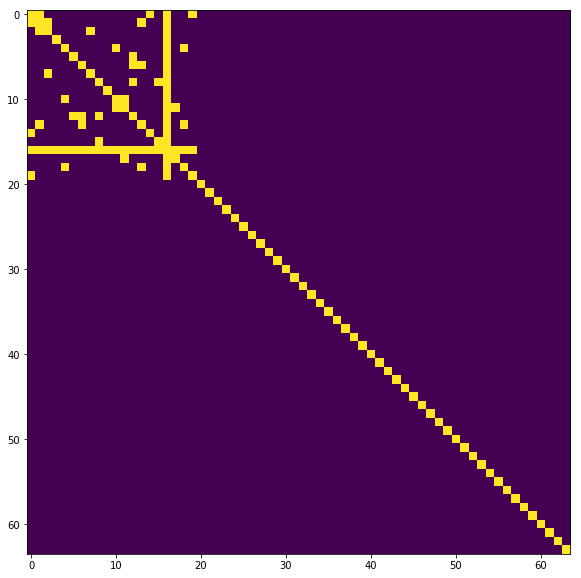

In [199]:
plt.figure(figsize=(10,10))
plt.imshow(eye)

In [192]:
import networkx as nx